# Introduction

The purpose of this project is to find the optimal allocations given my current financial portfolio and assuming long positions only. This is a simple project meant to demonstrate understanding of basic financial concepts. This is for educational purposes only and not financial advice.

I will be using the book <i>Python for Finance</i> by Yves Hilpisch as a rough guide for my analysis. However, changes will be made due to using a simplified version of my own portfolio and updated code.

In [1]:
### Import libraries
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
# get NVDA stock data
nvda = pdr.get_data_yahoo('NVDA', start='2021-01-01')
nvda.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.840088,56064000
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.746063,32276000
2021-01-06,132.225006,132.449997,125.860001,126.144997,125.861336,58042400
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.139938,46148000
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.468948,29252800


In [3]:
nvda.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-04,460.769989,460.769989,450.100006,455.100006,455.059998,43754300
2023-12-05,454.660004,466.000000,452.709991,465.660004,465.660004,37171800
2023-12-06,472.149994,473.869995,454.119995,455.029999,455.029999,38059000
2023-12-07,457.000000,466.290009,456.040009,465.959991,465.959991,35082300
2023-12-08,465.950012,477.410004,465.500000,475.059998,475.059998,35880300


### Exploratory Analysis

In [4]:
# calculate log returns of the 'Close' column
nvda['LogRet'] = np.log(nvda['Close'] / nvda['Close'].shift(1))
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,LogRet
Date,,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.840088,56064000,NaN
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.746063,32276000,0.021967
2021-01-06,132.225006,132.449997,125.860001,126.144997,125.861336,58042400,-0.060762
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.139938,46148000,0.056220
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.468948,29252800,-0.005052


In [5]:
# use the log returns to calculate volatility
nvda['Volatility'] = nvda['LogRet'].rolling(252).std()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

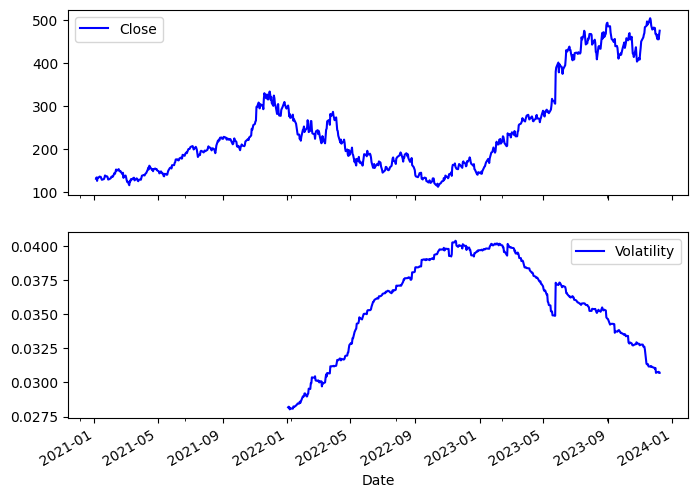

In [6]:
nvda[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8,6))

In [7]:
# rolling avgs
nvda['42d'] = np.round(nvda['Close'].rolling(42).mean(), 2)
nvda['252d'] = np.round(nvda['Close'].rolling(252).mean(), 2)

nvda[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2023-12-04,455.100006,456.68,341.13
2023-12-05,465.660004,457.13,342.31
2023-12-06,455.029999,457.07,343.46
2023-12-07,465.959991,457.38,344.67
2023-12-08,475.059998,457.79,345.92


<Axes: xlabel='Date'>

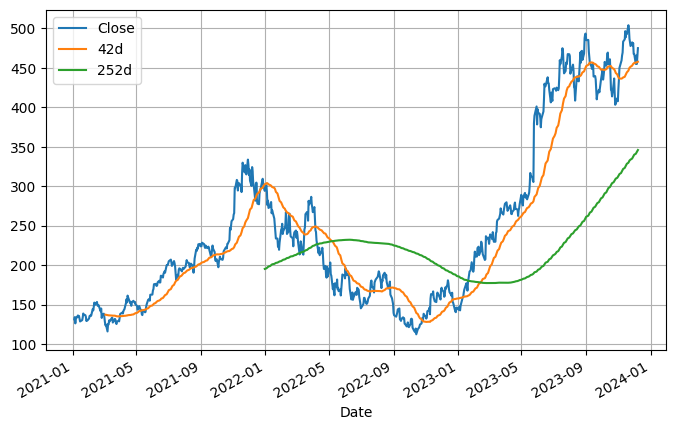

In [8]:
# rolling avgs fro a smaller window (42 days) and a larger window (252 days)
nvda[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [9]:
nvda['Return'] = np.log(nvda['Close'] / nvda['Close'].shift(1))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

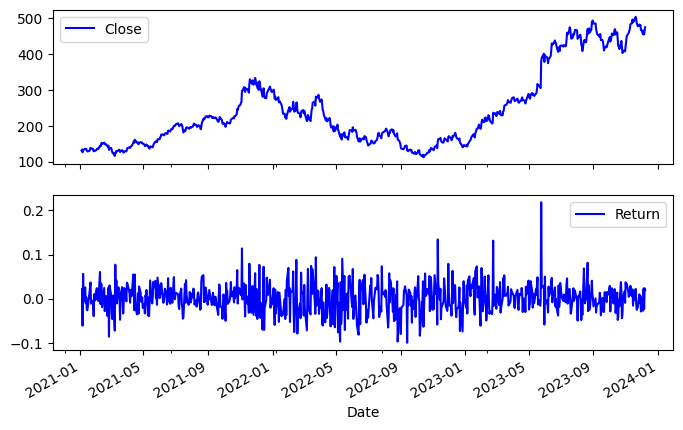

In [10]:
nvda[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5))

In [11]:
# moving volatility
import math
nvda['Mov_Vol'] = nvda['Return'].rolling(252).std() * math.sqrt(252)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

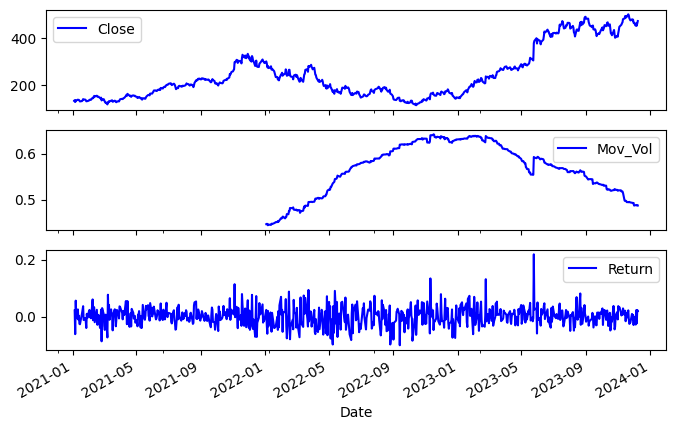

In [12]:
nvda[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8,5))

##### Editing Notes:
- delete redundant code
- condense all the code cells into this specific visual
- do this for other stock choices: AAPL, QYLD, SP500
- then move on to linear regression models to look at how eahc one might effect the other

# Bibliography
Hilpisch, Yves. <i>Python for Finance</i>. O'Reilly Media, Inc. December 2014.

###